# Week 1
---

## OLS
* OLS에서 w 계수 구하기
* R^2 값 구하기, TSS, RSS, ESS 구하기
* likelihood값 계산 (가우시안 정규분포를 가정)

## 가상 데이터 생성

In [17]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=200, n_features=1, n_targets=1, bias=50, noise=50, random_state=0)

## OLS

In [18]:
class OLS(object):    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.w = None
        self.resid = None
        self.TSS = None
        self.RSS = None
        self.R2 = None
        self.yhat = None
        
        
    def fit(self, arg=True):
        if arg:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), X))
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(self.X.transpose(), self.X)),self.X.transpose()), self.y)
        self.yhat = np.dot(self.X, self.w)
        self.resid = self.y - self.yhat
        # R-square
        self.TSS = ((self.yhat - self.y.mean())**2).sum() 
        self.RSS = (self.resid**2).sum()
        self.R2 = 1 - (self.RSS / self.TSS)
        
    def scatter(self):
        plt.figure(figsize=(7,7), dpi=100)
        plt.scatter(self.y, self.yhat)
        plt.xlabel('yhat')
        plt.ylabel('y')        
        plt.show()

In [19]:
model = OLS(X, y)

In [20]:
model.fit()

In [21]:
model.w

array([ 43.01966157,  97.54990084])

In [22]:
model.R2

0.75690448215604567

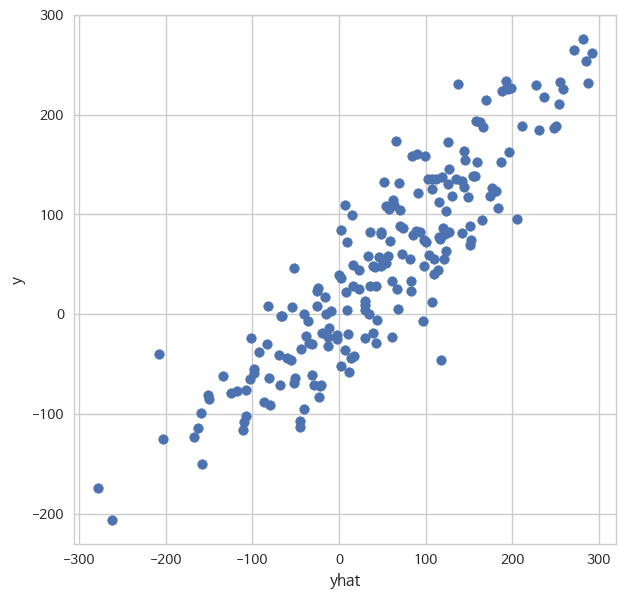

In [23]:
model.scatter()

## GD(Gradient Descent)
---
week 1내용은 아님

In [25]:
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [26]:
import time
import sys
from matplotlib import animation
from IPython.display import HTML

In [27]:
def cost(X, y, W):
    m = X.shape[0]
    sqr_error = (np.dot(X, W) - y) ** 2
    return sqr_error.sum() / (2 * m)

In [28]:
def d_cost(X, y, W):
    m = X.shape[0]
    error = np.dot(X, W) - y
    gradient = np.dot(X.T, error) / m
    return gradient

In [29]:
def gradient_descent(X, y, W0, n=1000, alpha=0.01):
    start = time.time()
    W = W0
    min_cost = np.inf
    history_ = {'epoch_val': [], 'cost_val': [], 'min_cost': [], 'W': [], 'y': []}
       
    for epoch in range(n):
        
        gradient = d_cost(X, y, W)
        W = W - alpha * gradient
        new_cost = cost(X, y, W)
            
        if round(min_cost, 8) == round(new_cost, 8):
            break
            
        if new_cost <= min_cost:
            min_cost = new_cost
        
        history_['epoch_val'].append(epoch)
        history_['cost_val'].append(new_cost)
        history_['min_cost'].append(min_cost)
        history_['W'].append(W)
        history_['y'].append(np.dot(X, W))
        
    end = time.time() - start
    print('Time: {}'.format(end))
    return W, history_

In [30]:
W0 = np.array([99, 591])

In [32]:
w_val, history_ = gradient_descent(X, y, W0, n=1000, alpha=0.1)

Time: 0.009652137756347656


In [33]:
w_val

array([ 43.01949791,  97.55006792])

In [34]:
model.w

array([ 43.01966157,  97.54990084])

### 찾아가는 과정

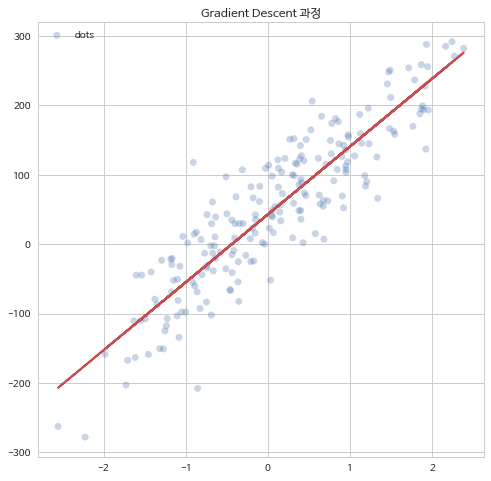

In [35]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
line, = ax1.plot([], [], 'r-', lw=2)
plt.scatter(X[:, 1], y, label='dots', alpha=0.3, edgecolors='none')
plt.title('Gradient Descent 과정')
plt.legend()
plt.grid(True)
fram = history_['epoch_val'][-1]

def animate(i):    
    xs = X[:, 1]
    ys = history_['y'][i]
    line.set_data(xs, ys)
    return line,

def init():
    line.set_data([], [])
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=fram-70, interval=100, blit=True)
HTML(anim.to_html5_video())

## SGD(Stochastic Gradient Descent)

In [61]:
# Shuffle Data for Finding W Quicker
total = np.hstack([y.reshape(-1, 1), X])
np.random.shuffle(total)
X = total[:, 1:]
y = total[:, 0]

In [53]:
def nextbatch(X, y, batch_size):
    for i in range(0, X.shape[0], batch_size):
        yield (X[i:i + batch_size], y[i:i + batch_size])

In [ ]:
def cost(X, y, W):
    m = X.shape[0]
    sqr_error = (np.dot(X, W) - y) ** 2
    return sqr_error.sum() / (2 * m)

In [ ]:
def d_cost(X, y, W):
    m = X.shape[0]
    gradient = np.dot(X.T, (np.dot(X, W) - y)) / m
    return gradient

In [68]:
def SGD(X, y, W0, n=10000, alpha=0.01, batch_size=10):
    start = time.time()
    W = W0
    min_cost = np.inf
    history_ = {'epoch': [], 'cost': [], 'min_cost': [], 'W': [], 'y': []}
    
    for epoch in range(n):
        for (batchX, batchY) in nextbatch(X, y, batch_size):
            gradient = d_cost(batchX, batchY, W)
            W = W - alpha * gradient
            new_cost = cost(batchX, batchY, W)
            
            if (new_cost / min_cost) < 0.999999:
                min_cost = new_cost
            else:
                break
        history_['epoch'].append(epoch)
        history_['cost'].append(new_cost)
        history_['min_cost'].append(min_cost)
        history_['W'].append(W)
        history_['y'].append(np.dot(X, W))
    end = time.time() - start
    print('Time: {}'.format(end))
    return W, history_

In [69]:
w_val_SGD, history_ = SGD(X, y, W0)

Time: 0.34338927268981934


In [70]:
w_val_SGD

array([  30.54046714,  102.83429183])

In [71]:
model.w

array([ 43.01966157,  97.54990084])

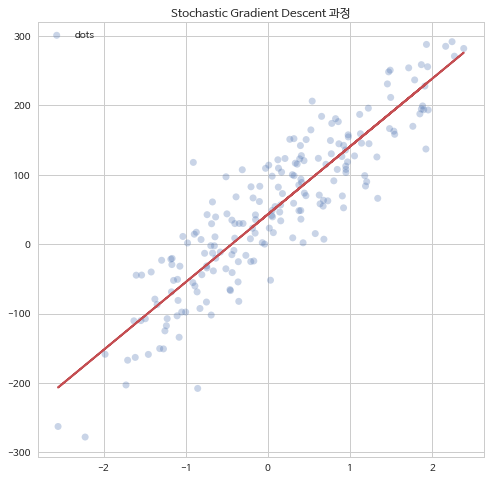

In [43]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
line, = ax1.plot([], [], 'r-', lw=2)
plt.scatter(X[:, 1], y, label='dots', alpha=0.3, edgecolors='none')
plt.title('Stochastic Gradient Descent 과정')
plt.legend()
plt.grid(True)
fram = history_['epoch'][-1]

def animate(i):    
    xs = X[:, 1]
    ys = history_['y'][i]
    line.set_data(xs, ys)
    return line,

def init():
    line.set_data([], [])
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=fram, interval=100, blit=True)
HTML(anim.to_html5_video())

In [24]:
for i in range(history_['epoch'][-1]):
    print('# {0} | cost: {1} | min_cost:{2}'.format(history_['epoch'][i], history_['cost'][i], history_['min_cost'][i]))

# 0 | cost: 89494.89061055495 | min_cost:10000000000000000
# 1 | cost: 60239.53833486866 | min_cost:89494.89061055495
# 2 | cost: 40968.28131416726 | min_cost:60239.53833486866
# 3 | cost: 28221.410461603577 | min_cost:40968.28131416726
# 4 | cost: 19749.553661959253 | min_cost:28221.410461603577
# 5 | cost: 14087.705894972416 | min_cost:19749.553661959253
# 6 | cost: 10279.759426613135 | min_cost:14087.705894972416
# 7 | cost: 7700.221766898469 | min_cost:10279.759426613135
# 8 | cost: 5938.72887320112 | min_cost:7700.221766898469
# 9 | cost: 4725.157372308355 | min_cost:5938.72887320112
# 10 | cost: 3881.004202949902 | min_cost:4725.157372308355
# 11 | cost: 3287.7752791753883 | min_cost:3881.004202949902
# 12 | cost: 2866.398603820783 | min_cost:3287.7752791753883
# 13 | cost: 2563.790849341371 | min_cost:2866.398603820783
# 14 | cost: 2344.071628907507 | min_cost:2563.790849341371
# 15 | cost: 2182.80198043102 | min_cost:2344.071628907507
# 16 | cost: 2063.194152846569 | min_cost:2